# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
np.random.seed(7)

In [3]:
main_data=pd.read_csv('/workspaces/sngando88-machine-learning-python-template-Time_Series_Part2/data/raw/Aquifer_Luco.csv')

In [4]:
main_data

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.90,6.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663


In [5]:
main_data.head()

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [6]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 7487 non-null   object 
 1   Rainfall_Simignano                   6822 non-null   float64
 2   Rainfall_Siena_Poggio_al_Vento       951 non-null    float64
 3   Rainfall_Mensano                     1722 non-null   float64
 4   Rainfall_Montalcinello               6525 non-null   float64
 5   Rainfall_Monticiano_la_Pineta        2205 non-null   float64
 6   Rainfall_Sovicille                   6657 non-null   float64
 7   Rainfall_Ponte_Orgia                 1260 non-null   float64
 8   Rainfall_Scorgiano                   3036 non-null   float64
 9   Rainfall_Pentolina                   2116 non-null   float64
 10  Rainfall_Monteroni_Arbia_Biena       3104 non-null   float64
 11  Depth_to_Groundwater_Podere_Ca

In [7]:
main_data1=main_data[['Date','Rainfall_Simignano']]

In [8]:
main_data1

,Date,Rainfall_Simignano
0,01/01/2000,NaN
1,02/01/2000,NaN
2,03/01/2000,NaN
3,04/01/2000,NaN
4,05/01/2000,NaN
...,...,...
7482,26/06/2020,0.0
7483,27/06/2020,0.0
7484,28/06/2020,0.0
7485,29/06/2020,0.0


In [9]:
from datetime import datetime,date
main_data1['Date']=pd.to_datetime(main_data1['Date'],format = '%d/%m/%Y')

In [10]:
main_data1.head()

,Date,Rainfall_Simignano
0,2000-01-01,NaN
1,2000-01-02,NaN
2,2000-01-03,NaN
3,2000-01-04,NaN
4,2000-01-05,NaN


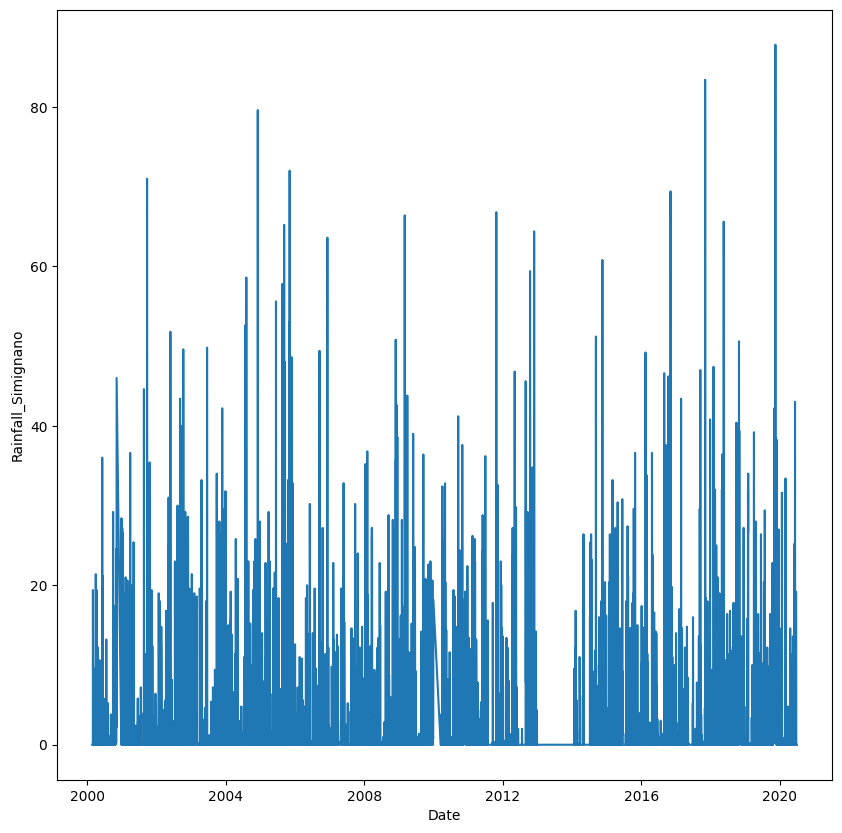

In [11]:
fig,axes=plt.subplots(figsize=(10,10))
sns.lineplot(x=main_data1['Date'],y=main_data1['Rainfall_Simignano'])
axes.set_xlabel('Date')
axes.set_ylabel('Rainfall_Simignano')
plt.show()

In [16]:
main_data1= main_data1.sort_values(by='Date')

# Check time intervals
main_data1['delta'] = main_data1['Date'] - main_data1['Date'].shift(1)

main_data1[['Date', 'delta']].head()

,Date,delta
0,2000-01-01,NaT
1,2000-01-02,1 days
2,2000-01-03,1 days
3,2000-01-04,1 days
4,2000-01-05,1 days


In [17]:
main_data1['delta'].sum(), main_data1['delta'].count()

(Timedelta('7486 days 00:00:00'), np.int64(7486))

In [19]:
main_data1 = main_data1.drop('delta', axis=1)
main_data1.isna().sum()

Date                    0
Rainfall_Simignano    665
dtype: int64

In [1]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = main_data1['River_Hydrometry'].copy()
main_data1['River_Hydrometry'] = main_data1['River_Hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=main_data1['River_Hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = main_data1['drainage_volume'].copy()
main_data1['drainage_volume'] = main_data1['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=main_data1['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

NameError: name 'plt' is not defined